Google Stock Price Prediction using RNN

Note: Different implementations were tested to find the effect of different parameters on the prediction results of which are included in the report along with the changes required i.e(Number of Epochs, Compiler type, model version, model units etc). To reconstruct the results of the report, kindly change the variables and select/uncomment the model as presented in the report respectively.

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential # allow us to create a neural network object representing a sequence of layers
from tensorflow.keras.layers import Dense #to add the output layer 
from tensorflow.keras.layers import LSTM # to add LSTM layer
from tensorflow.keras.layers import Dropout #to add some dropout regularization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
#Loading the Training File
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
#Scaling the training data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
#splitting data into training and validation
X_train = []
y_train = []
X_val = []
y_val = []

for i in range(60, 1100):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

for i in range(1100, 1258):
    X_val.append(training_set_scaled[i-60:i, 0])
    y_val.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)

In [5]:
#reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

**Model 1**

In [6]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [7]:
regressor.add(Dense(units = 1))

**Model 2**

In [8]:
#ver 1
#regressor = Sequential()
#regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units=100,return_sequences=True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units=100,return_sequences=True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units=100,return_sequences=True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units=100))
#regressor.add(Dropout(0.2))

#regressor.add(Dense(units=1))

In [9]:
#ver 2
#regressor = Sequential()
#regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units=100,return_sequences=True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units=100,return_sequences=True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units=100,return_sequences=True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units=50))
#regressor.add(Dropout(0.2))

#regressor.add(Dense(units=1))

In [10]:
from tensorflow.keras import backend as K

def coeff_determination(y_true, y_pred):
    from tensorflow.keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

regressor.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics=[coeff_determination])

In [11]:

model_checkpoint_callback = ModelCheckpoint(
    filepath='stock.h5',
    save_weights_only=False,
    monitor='coeff_determination',
    mode='max',
    save_best_only=True)
hist = regressor.fit(X_train, y_train, epochs = 200, batch_size = 16, validation_data = (X_val,y_val))

Epoch 1/200
65/65 [==============================] - 37s 35ms/step - loss: 0.0548 - coeff_determination: -0.0598 - val_loss: 0.0038 - val_coeff_determination: -16.3936
Epoch 2/200
65/65 [==============================] - 1s 13ms/step - loss: 0.0051 - coeff_determination: 0.8974 - val_loss: 0.0019 - val_coeff_determination: -5.2418
Epoch 3/200
65/65 [==============================] - 1s 13ms/step - loss: 0.0049 - coeff_determination: 0.9038 - val_loss: 0.0104 - val_coeff_determination: -47.9039
Epoch 4/200
65/65 [==============================] - 1s 13ms/step - loss: 0.0043 - coeff_determination: 0.9190 - val_loss: 0.0034 - val_coeff_determination: -13.4570
Epoch 5/200
65/65 [==============================] - 1s 13ms/step - loss: 0.0044 - coeff_determination: 0.9144 - val_loss: 0.0014 - val_coeff_determination: -2.7021
Epoch 6/200
65/65 [==============================] - 1s 13ms/step - loss: 0.0046 - coeff_determination: 0.9138 - val_loss: 0.0021 - val_coeff_determination: -6.5816
Epoch

Reading test data and making predictions

In [12]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


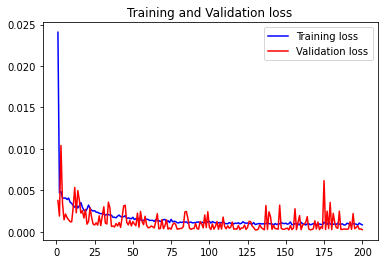

In [13]:
r2score = hist.history['loss']
val_r2score = hist.history['val_loss']
epochs = range(1, len(r2score) + 1)

# # Train and validation accuracy
plt.plot(epochs, r2score, 'b', label='Training loss')
plt.plot(epochs, val_r2score, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

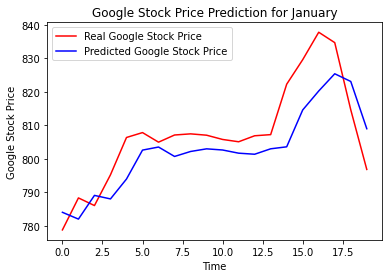

In [14]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction for January')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [15]:
import math
from sklearn.metrics import r2_score

r2_score(real_stock_price,predicted_stock_price)


0.6193872509573843